## 問題設定
日本の各都道府県には、東京のように店舗数やそこに揃えられている商品数が多く、食料の選択肢が多い県とそうでない県がある。
そこで世帯人員が増えることによる食生活の変化がどの程度であるかを検証したい。
つまり、日本の各都道府県の月あたりの肉類の消費量を各都道府県の世帯人員によって説明したい。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('C:/Users/koyama/OneDrive/4期/応用統計1/SSDSE-C-2022 aaa.csv',encoding='shift-jis')
df.head()

,都道府県,世帯人員,肉類
0,全国,2.95,95071
1,北海道,2.84,90249
2,青森県,2.87,86377
3,岩手県,3.12,78536
4,宮城県,3.00,87201


In [3]:
df=df.drop(0)
df

,都道府県,世帯人員,肉類
1,北海道,2.84,90249
2,青森県,2.87,86377
3,岩手県,3.12,78536
4,宮城県,3.00,87201
5,秋田県,2.72,83125
6,山形県,3.21,102538
7,福島県,2.99,82233
8,茨城県,2.80,77479
9,栃木県,2.90,86076
10,群馬県,2.89,74564


In [4]:
y = df["肉類"]
x = df['世帯人員']

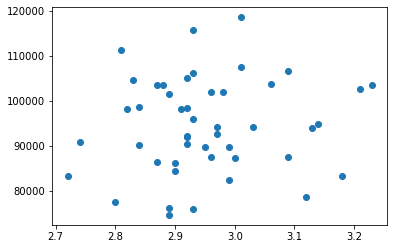

In [5]:
plt.scatter(x,y)

散布図において一貫性がなく、相関がないように思われる。

In [6]:
p_s = 0.05

In [7]:
r, p = pearsonr(x,y)

In [8]:
r

0.10270000056827466

In [9]:
p

0.4921228058397235

In [10]:
if p < p_s:
    print(f"肉類と世帯人員 には相関があり、相関係数は{ｒ}であった。")
elif p >= p_s:
    print(f"世帯人員と肉類には相関がない可能性を排除できなかった。")

世帯人員と肉類には相関がない可能性を排除できなかった。


(0.0, 120000.0)

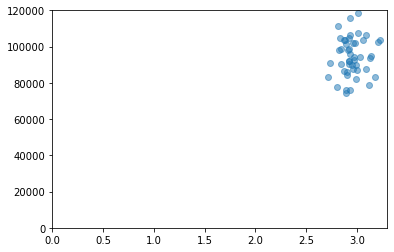

In [11]:
plt.scatter(x,y,alpha=0.5)
plt.xlim(xmin = 0,xmax=3.3)
plt.ylim(ymin = 0,ymax=120000)

In [12]:
deta_0 = 65000
deta_1 =10000

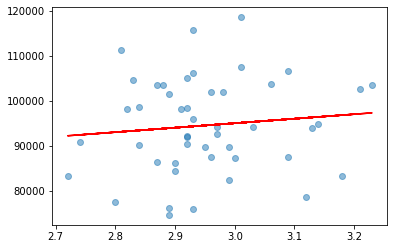

In [13]:
y_est = deta_0 + deta_1 * x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [14]:
resid = y_est -y

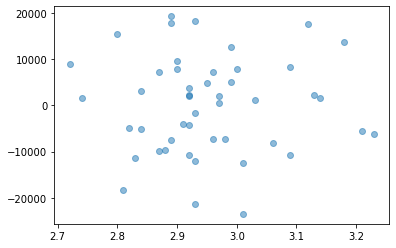

In [15]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [16]:
np.sum(resid**2)

5079577352.0

In [17]:
log = {
    "切片":[2.6,50000,],
    "傾き":[3,10000,10000],
    "誤差2乗和":[433797320011.0594,
                 15856233393.0,
                 5079903393.0]
}

In [18]:
import statsmodels.api as sm


In [19]:
X = sm.add_constant(x)


In [20]:
model =sm.OLS(y,X)

In [21]:
res = model.fit()

In [22]:
deta0_est,deta1_est = res.params
print(deta0_est,deta1_est)

66546.2204876639 9466.587197058834


In [23]:
y_est = deta0_est + deta1_est*x

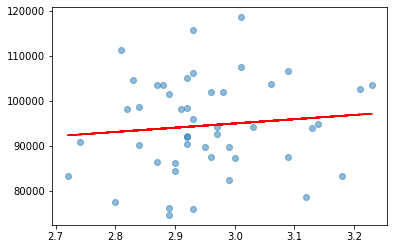

In [24]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [25]:
resid =y_est -y

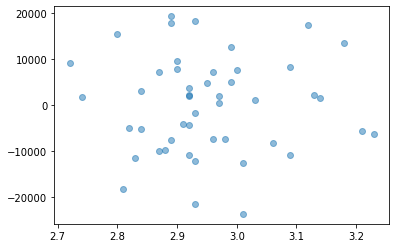

In [26]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [27]:
np.sum(resid**2)

5079366091.097838

In [28]:
log

{'切片': [2.6, 50000],
 '傾き': [3, 10000, 10000],
 '誤差2乗和': [433797320011.0594, 15856233393.0, 5079903393.0]}

In [29]:
df.describe()

,世帯人員,肉類
count,47.000000,47.000000
mean,2.952979,94500.851064
std,0.114605,10563.998253
min,2.720000,74564.000000
25%,2.890000,87301.000000
50%,2.930000,94116.000000
75%,3.005000,102988.000000
max,3.230000,118608.000000


In [30]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     肉類   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4797
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.492
Time:                        03:23:00   Log-Likelihood:                -501.40
No. Observations:                  47   AIC:                             1007.
Df Residuals:                      45   BIC:                             1011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.655e+04   4.04e+04      1.648      0.1

目的変数「月あたりの肉類の消費量」に対する説明変数「各都道府県の世帯人員」の単回帰係数の推定値は9463.6987であった。
すなわち、「各都道府県の世帯人員」が1人増加すると「月あたりの肉類の消費量」は9466.5872g増加するとする。
これは、日本人1人あたりの月あたりの肉類の消費量が9466.5872gだと考えられるので、世帯人員が1人増加するごとに月あたりの肉の消費量が9466.5872gづつ増えるからだと思われる。

また、切片の推定値は6.655e+04であった。
すなわち、「各都道府県の世帯人員」が0であるとき、「月あたりの肉類の消費量」は66550gであると推定された。
これは、データが0を含まないため切片を解釈することは意味をなさないと思われる。

ただし、上記の議論は「各都道府県の世帯人員」の平均が2.72から3.23の範囲でののみ有効である。
また、「月あたりの肉類の消費量」と「各都道府県の世帯人員」の関係性は必ずしも因果を説明している訳ではない。
すなわち、「月あたりの肉類の消費量」を増やすために「各都道府県の世帯人員」を操作することは意味をなさない場合がある。
また、この分析では「各都道府県の世帯人員」の他に「月あたりの肉類の消費量」と関係を持つ要因を一切考慮していない。
すなわち、データに加えられていない何らかの要因によって「各都道府県の世帯人員」と「月あたりの肉類の消費量」に疑似的な相関関係が生じている可能性を否定できない。

目的変数「月あたりの肉類の消費量」に対する説明変数「各都道府県の世帯人員」の回帰係数は5%の有意水準ではゼロである可能性を棄却できない。「各都道府県の世帯人員」は「月あたりの肉類の消費量」と相関を持つと言い切ることができない。
また、回帰係数の95%信頼区間は[ -1.81e+04,3.7e+04]の範囲であり、この範囲内に傾きの真値が存在すると考えることが整合的である。

In [32]:
resid = y_est - y

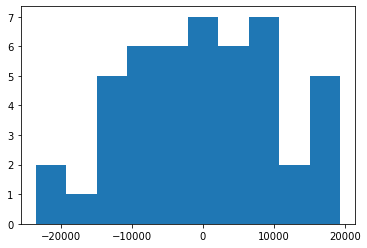

In [33]:
plt.hist(resid)
plt.show()

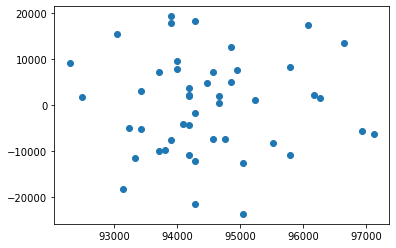

In [34]:
plt.scatter(y_est,resid)
plt.show()

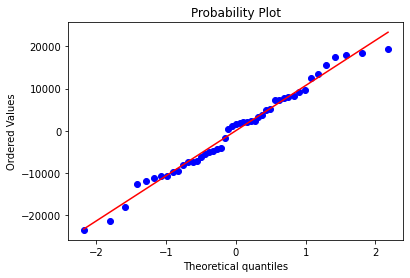

In [35]:
from scipy.stats import probplot
ax = plt.subplot()
probplot(resid,plot=ax)
plt.show()

残差のヒストグラムを見ると左右非対称であり、1つの山を持つつりがね型と言えない形状をするため、正規分布と異なる形状をしている事が分かる。
残差プロットを見ると目的変数の推定値は残差と無関係であるため、独立であると言えそうである。
QQプロットを見るとデータ点が直線上に概ね載っているため、正規分布に近い形状をしている事が分かる。
以上の事から、今回の回帰分析モデルは誤差が独立な正規分布から発生しているという前提を満たさないと判断される。



In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(y, y_est)

10395.750043144

In [38]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     肉類   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4797
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.492
Time:                        03:47:15   Log-Likelihood:                -501.40
No. Observations:                  47   AIC:                             1007.
Df Residuals:                      45   BIC:                             1011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.655e+04   4.04e+04      1.648      0.1

RMSE        10395.750043144

決定係数　  0.011 

F検定のp値　0.4797

AIC         1007

RMSEは10395.750043144gであり、目的変数の推定値は真値に比べ平均的に10395.750043144g程度の差がある。
決定係数は0.011であり、モデルによる目的変数の推定値によって、単純に目的変数を平均値で推定することに比べて、変動が1.1%小さくなる。
F検定のp値は0.4797であり、有意水準0.5%で回帰係数は少なくとも1つは0ではないため対立仮説を採択する、回帰分析モデルがデータに適合していない可能性を排除できない。また, AICは1007であった。